In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Load Dataset

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [7]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_index = train_df.index
test_index = test_df.index

In [10]:
test_index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [11]:
y_train_df = train_df.pop("Survived")

In [12]:
y_train_df.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Data preprocessing

In [13]:
pd.set_option('display.float_format', lambda x: "%.2f" % x) # 소수점 두째자리까지만

In [14]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [15]:
train_df.isnull().sum() / len(train_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.20
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.77
Embarked   0.00
dtype: float64

#### Decision 1 - Drop cabin

In [16]:
del test_df["Cabin"]
del train_df["Cabin"]

In [17]:
all_df = train_df.append(test_df)
all_df.shape

(1309, 9)

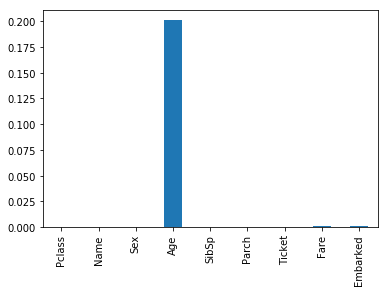

In [18]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [19]:
len(all_df)

1309

In [20]:
del all_df["Name"]
del all_df["Ticket"]

In [21]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


In [22]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [23]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [25]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [26]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [27]:
pd.get_dummies(all_df["Embarked"], prefix="embarked")

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [28]:
matrix_df = pd.merge(all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"),
                    left_index=True, right_index=True)
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


In [29]:
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


In [30]:
# Pclass에 따른 Age값의 평균확인
all_df.groupby("Pclass")["Age"].mean()
# 결과확인상 Pclass가 1일수록 나이가 많고 3으로 낮아질수록 나이가 적어짐

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [31]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [32]:
# all_df.groupby("Pclass")["Age"].transform("mean")
# 기존에 있는 Age까지 Pclass에 따라 Age를 할당시킴

In [33]:
all_df.loc[(all_df["Pclass"]==1) & (all_df["Age"].isnull()) , "Age"]

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [34]:
all_df.loc[(all_df["Pclass"]==1) & (all_df["Age"].isnull()) , "Age"] = 39.16
all_df.loc[(all_df["Pclass"]==2) & (all_df["Age"].isnull()) , "Age"] = 29.51
all_df.loc[(all_df["Pclass"]==3) & (all_df["Age"].isnull()) , "Age"] = 24.82

In [35]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [36]:
all_df.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [37]:
all_df[all_df["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [38]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13.30

In [39]:
del all_df["Embarked"]

In [40]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A", 2:"B", 3:"C"})

In [41]:
all_df = pd.get_dummies(all_df)
all_df

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1
2,1,38.00,1,0,71.28,1,0,0
3,1,26.00,0,0,7.92,0,0,1
4,1,35.00,1,0,53.10,1,0,0
5,0,35.00,0,0,8.05,0,0,1
6,0,24.82,0,0,8.46,0,0,1
7,0,54.00,0,0,51.86,1,0,0
8,0,2.00,3,1,21.07,0,0,1
9,1,27.00,0,2,11.13,0,0,1


In [42]:
all_df = pd.merge(all_df, matrix_df[["embarked_0", "embarked_1", "embarked_2", "embarked_99"]],
        left_index = True, right_index= True)

In [43]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [44]:
train_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0
4,1,35.00,1,0,53.10,1,0,0,1,0,0,0
5,0,35.00,0,0,8.05,0,0,1,1,0,0,0


In [45]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,1,0
893,1,47.00,1,0,7.00,0,0,1,1,0,0,0
894,0,62.00,0,0,9.69,0,1,0,0,0,1,0
895,0,27.00,0,0,8.66,0,0,1,1,0,0,0
896,1,22.00,1,1,12.29,0,0,1,1,0,0,0


### Build Model by deep_learning

In [305]:
x_data = train_df.as_matrix()
y_data = y_train_df.as_matrix()
y_data = np.array([[ k for k in i] for i in zip(y_data)])

c:\users\lg\appdata\local\conda\conda\envs\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\lg\appdata\local\conda\conda\envs\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [306]:
x_data.shape, y_data.shape

((891, 12), (891, 1))

In [309]:
x_test_data.shape

(418, 12)

In [312]:
nb_classes = 2

X = tf.placeholder(tf.float32,[None,12])
Y = tf.placeholder(tf.int32,[None,1])

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1,nb_classes])

W = tf.Variable(tf.random_normal([12,nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(Logits) / reduce_sum(exp(Logits), dim)
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

# cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# # parameters
# training_epochs = 15
# batch_size = 100

# with tf.Session() as sess:
#     # Initialize TensorFlow variables
#     sess.run(tf.global_variables_initializer())
#     # Training cycle
#     for epoch in range(training_epochs):
#         avg_cost = 0
#         total_batch = int(mnist.train.num_examples / batch_size)
        
#         for i in range(total_batch):
#             batch_xs, batch_ys = mnist.train.next_batch(batch_size) #batch_size 만큼 나눠서 학습
#             c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
#             avg_cost += c / total_batch

#         print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        
        
        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(20001):
        sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
        if step %1000 ==0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X:x_data, Y:y_data})
            print("Step: {}\tLoss: {}\tAcc:{}".format(step, loss, acc))
    
    
    pred = sess.run(prediction, feed_dict={X:x_test_data})
    
    print(pred)
        
        
        
        
#     pred = sess.run(prediction, feed_dict={X:x_data})
    
#     for p, y in zip(pred, y_data.flatten()):
#         print("[{}] Prediction: {} True Y : {}".format(p == int(y), p, int(y)))

Step: 0	Loss: 70.6534194946289	Acc:0.6161616444587708
Step: 1000	Loss: 25.786746978759766	Acc:0.6060606241226196
Step: 2000	Loss: 11.802641868591309	Acc:0.7631874084472656
Step: 3000	Loss: 44.557044982910156	Acc:0.39169472455978394
Step: 4000	Loss: 39.918758392333984	Acc:0.3973063826560974
Step: 5000	Loss: 14.379323959350586	Acc:0.7542087435722351
Step: 6000	Loss: 21.990070343017578	Acc:0.6823793649673462
Step: 7000	Loss: 9.53909969329834	Acc:0.7620651125907898
Step: 8000	Loss: 24.403270721435547	Acc:0.6262626051902771
Step: 9000	Loss: 24.073055267333984	Acc:0.6285073161125183
Step: 10000	Loss: 24.154115676879883	Acc:0.6240179538726807
Step: 11000	Loss: 24.03939437866211	Acc:0.6251403093338013
Step: 12000	Loss: 23.937908172607422	Acc:0.6251403093338013
Step: 13000	Loss: 23.838680267333984	Acc:0.6273849606513977
Step: 14000	Loss: 23.738609313964844	Acc:0.6273849606513977
Step: 15000	Loss: 23.63819122314453	Acc:0.6273849606513977
Step: 16000	Loss: 23.541318893432617	Acc:0.627384960651397

In [318]:
result = np.concatenate((test_index.values.reshape(-1,1), pred.reshape(-1,1)), axis=1)
result

array([[ 892,    0],
       [ 893,    1],
       [ 894,    1],
       [ 895,    0],
       [ 896,    1],
       [ 897,    1],
       [ 898,    1],
       [ 899,    1],
       [ 900,    1],
       [ 901,    1],
       [ 902,    0],
       [ 903,    1],
       [ 904,    1],
       [ 905,    1],
       [ 906,    1],
       [ 907,    1],
       [ 908,    1],
       [ 909,    1],
       [ 910,    1],
       [ 911,    1],
       [ 912,    1],
       [ 913,    0],
       [ 914,    1],
       [ 915,    1],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    1],
       [ 920,    1],
       [ 921,    1],
       [ 922,    1],
       [ 923,    1],
       [ 924,    1],
       [ 925,    1],
       [ 926,    1],
       [ 927,    1],
       [ 928,    1],
       [ 929,    1],
       [ 930,    0],
       [ 931,    1],
       [ 932,    1],
       [ 933,    1],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    1],
       [ 939,

In [319]:
df_submission = pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


In [320]:
df_submission.to_csv("submission_result_deep_learning.csv",index=False)